In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Cargar el dataset
data = pd.read_csv('train.csv',sep=",")

# Convertir la columna 'date' a datetime y establecerla como índice
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Resamplear los datos a nivel mensual, sumando el consumo
data_weekly = data.groupby('substation').resample('W').sum()

# Lista de subestaciones únicas
substations = data['substation'].unique()

In [3]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

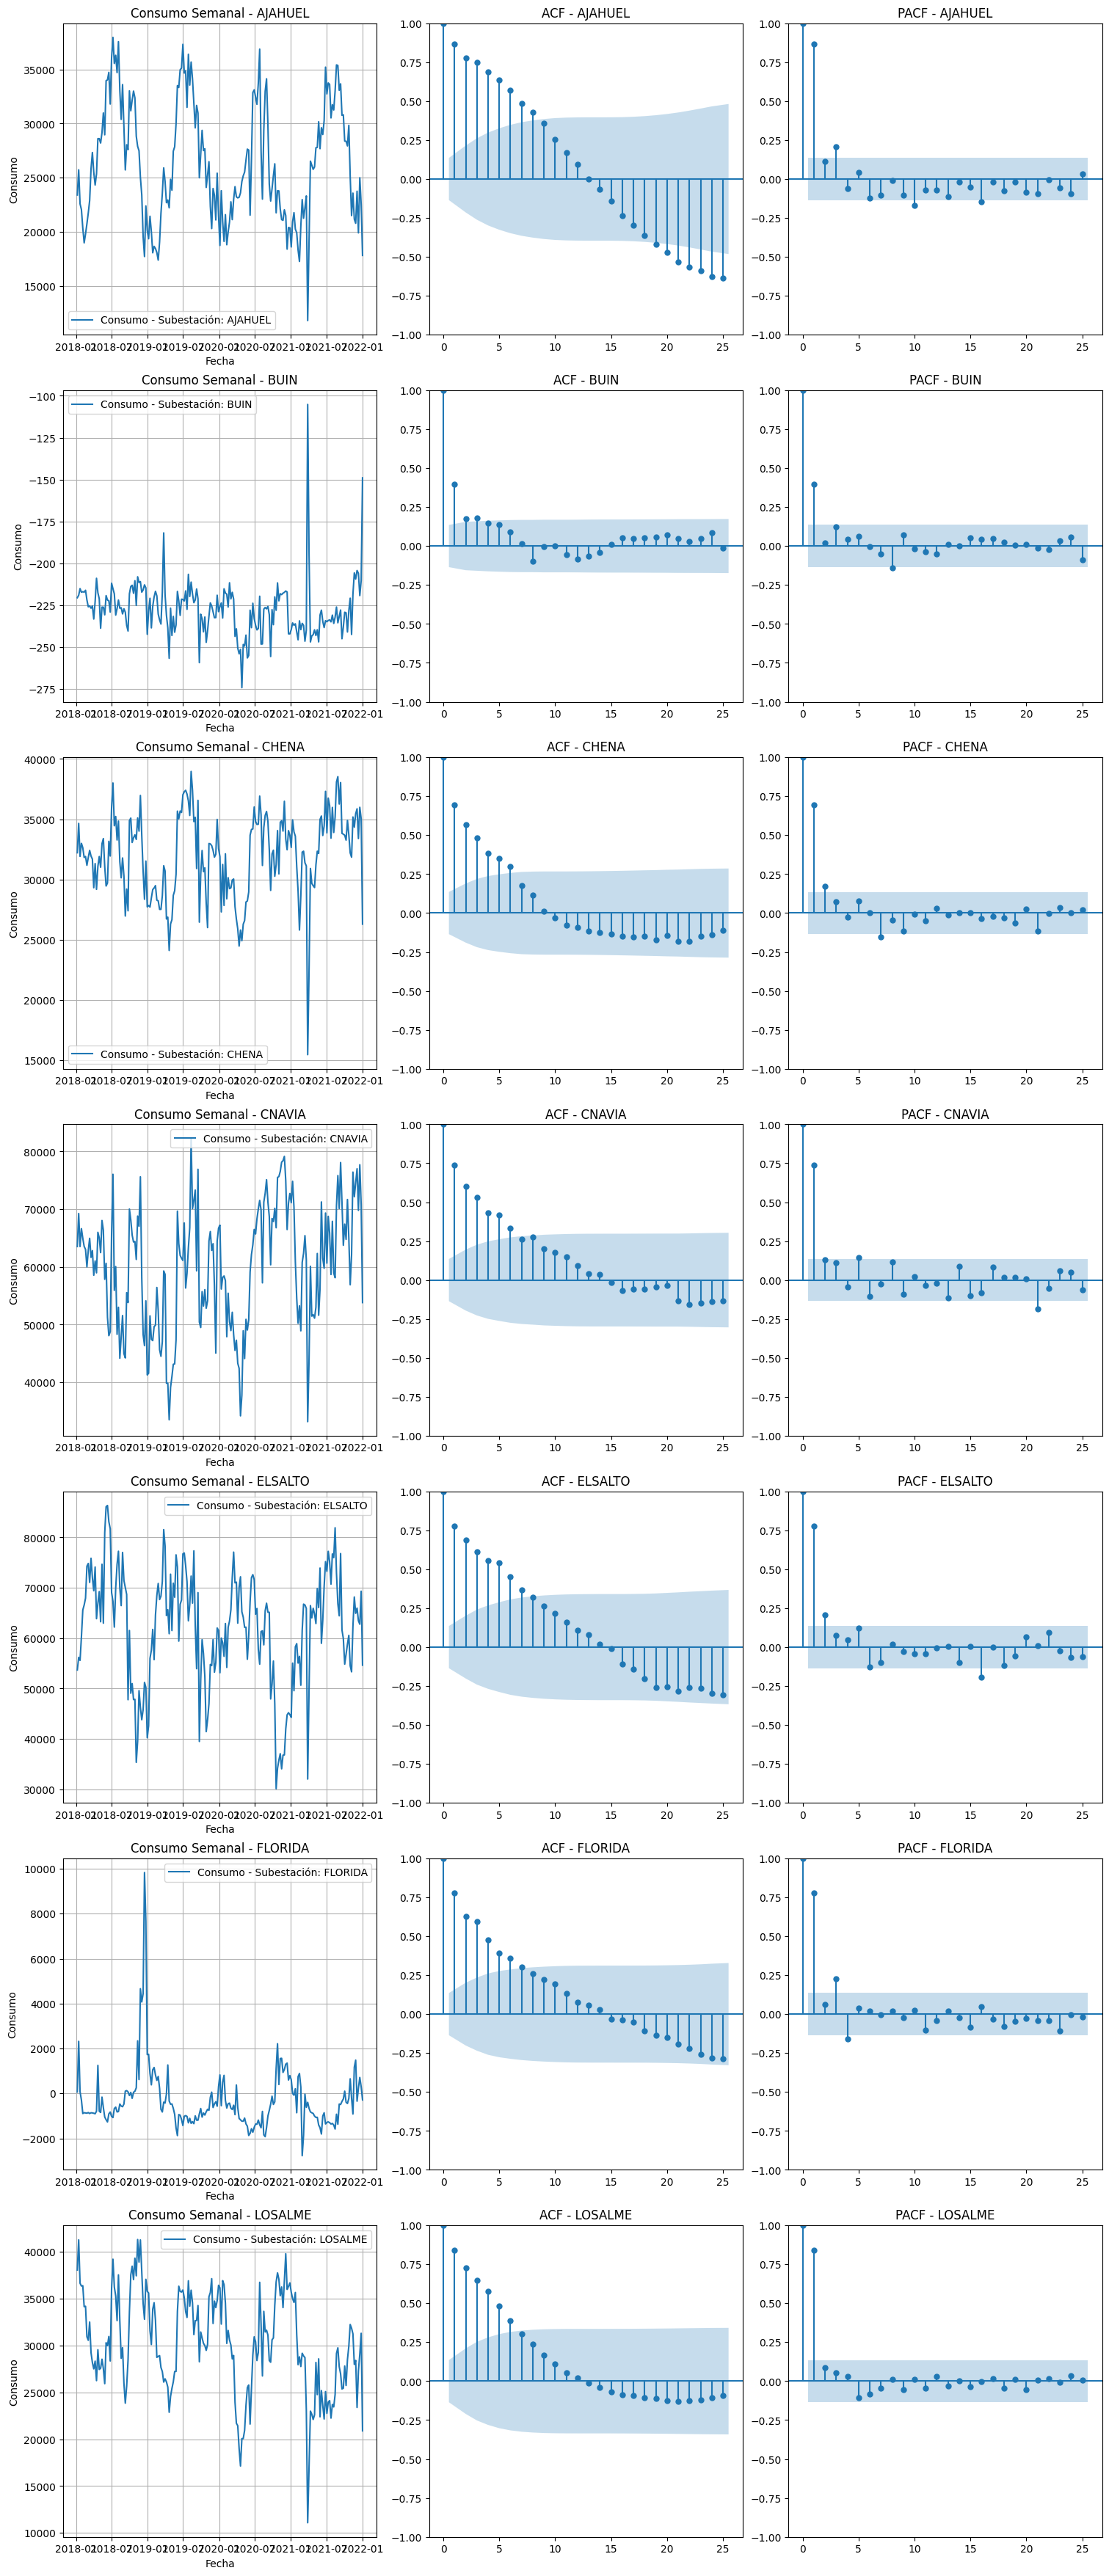

In [4]:
num_lags = 25

# Lista de subestaciones únicas
substations = data['substation'].unique()

# Número de gráficos por fila y por columna
n_cols = 3
n_rows = (len(substations) * 3 + n_cols - 1) // n_cols  # Calcular el número de filas necesarias

# Crear una figura con subgráficas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)

# Aplanar el array de ejes para facilitar la iteración
axes = axes.flatten()

# Contador para la posición actual de ejes
current_axis = 0

# Crear gráficos para cada subestación
for substation in substations:
    # Filtrar los datos para la subestación actual
    substation_data = data_weekly.xs(substation, level='substation')['consumption']
    
    # Graficar el consumo mensual
    ax = axes[current_axis]
    ax.plot(substation_data.index, substation_data, label=f'Consumo - Subestación: {substation}')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Consumo')
    ax.set_title(f'Consumo Semanal - {substation}')
    ax.legend()
    ax.grid(True)
    current_axis += 1
    
    # Graficar la autocorrelación
    ax = axes[current_axis]
    plot_acf(substation_data, lags=num_lags, ax=ax)
    ax.set_title(f'ACF - {substation}')
    current_axis += 1
    
    # Graficar la autocorrelación parcial
    ax = axes[current_axis]
    plot_pacf(substation_data, lags=num_lags, ax=ax)
    ax.set_title(f'PACF - {substation}')
    current_axis += 1

# Eliminar cualquier eje no utilizado si hay menos gráficos que subgráficas
for i in range(current_axis, len(axes)):
    fig.delaxes(axes[i])

# Mostrar los gráficos
plt.show()

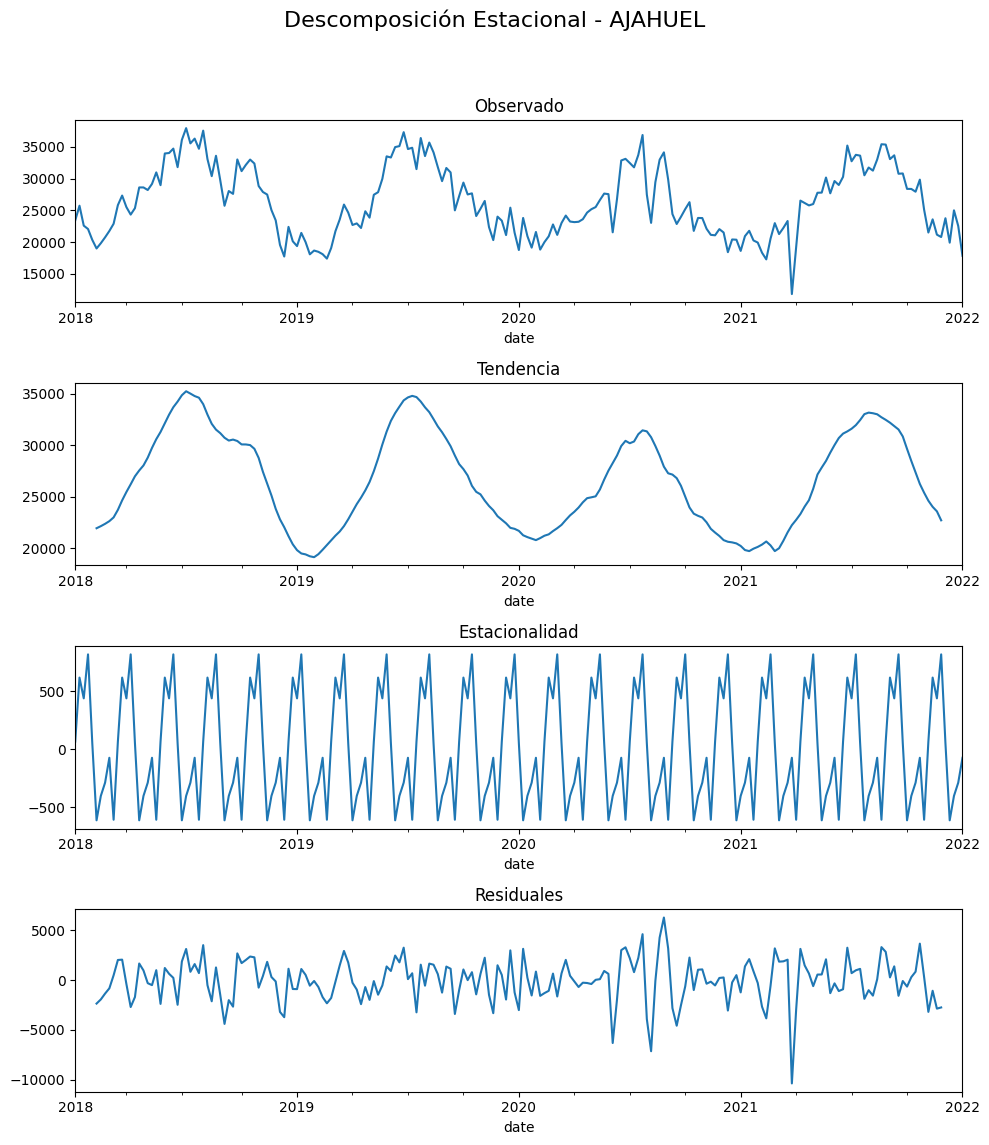

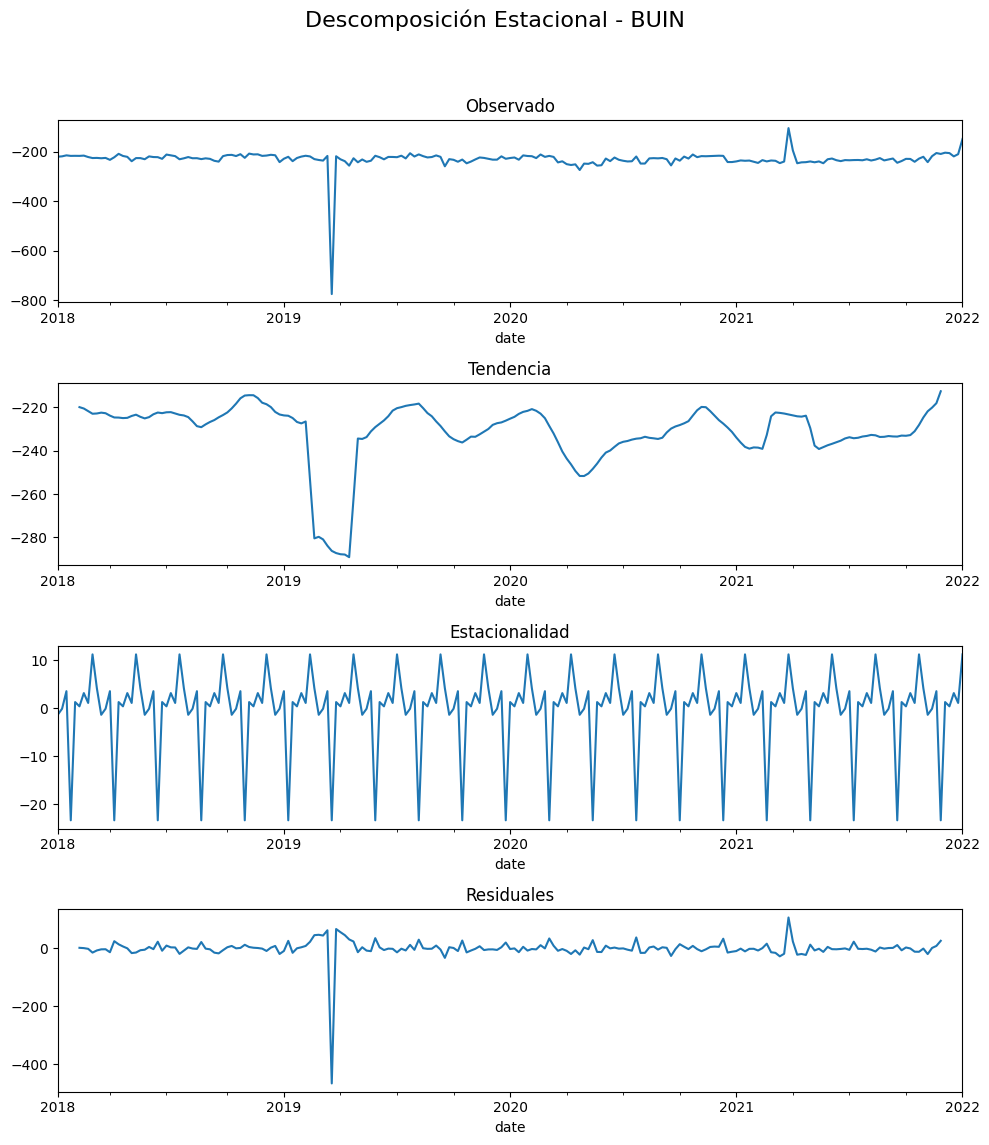

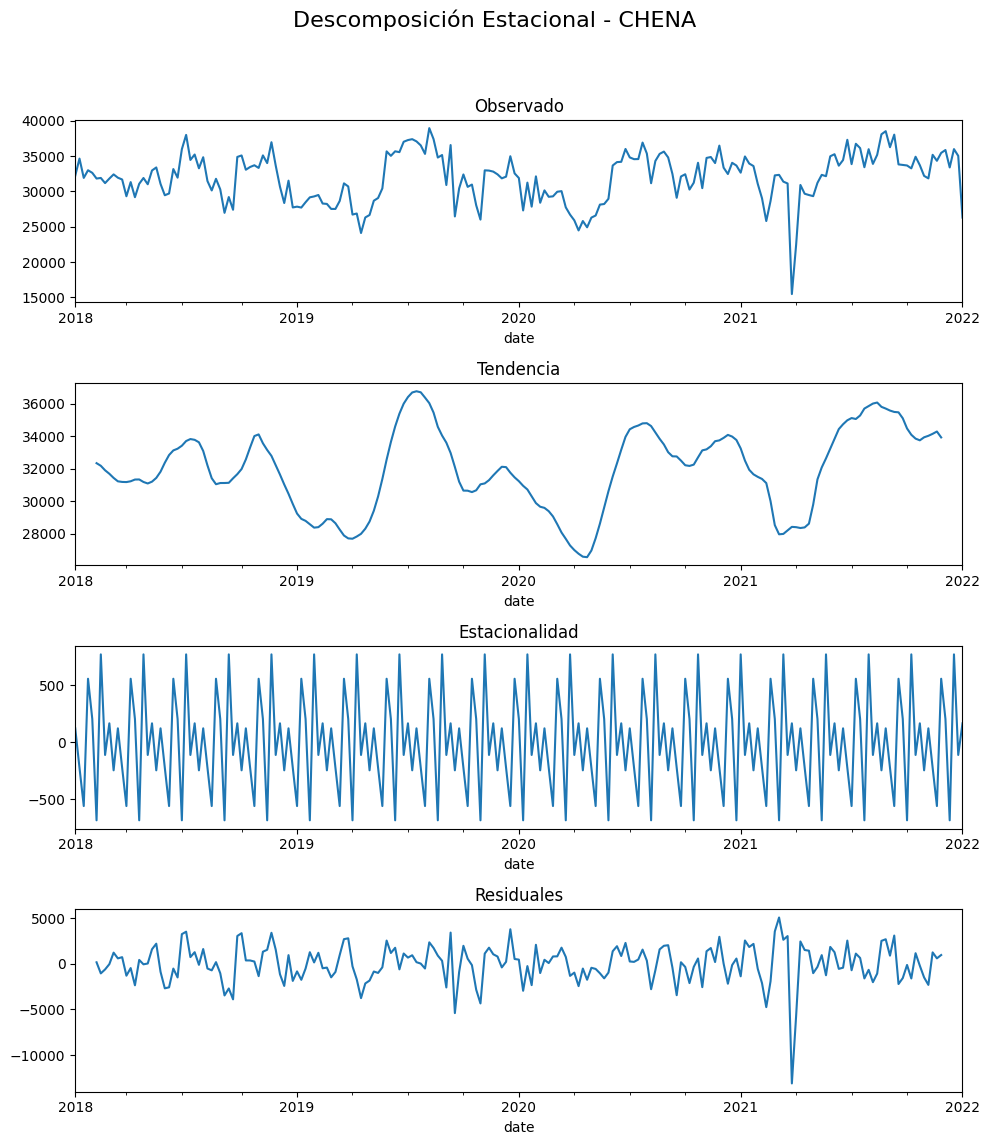

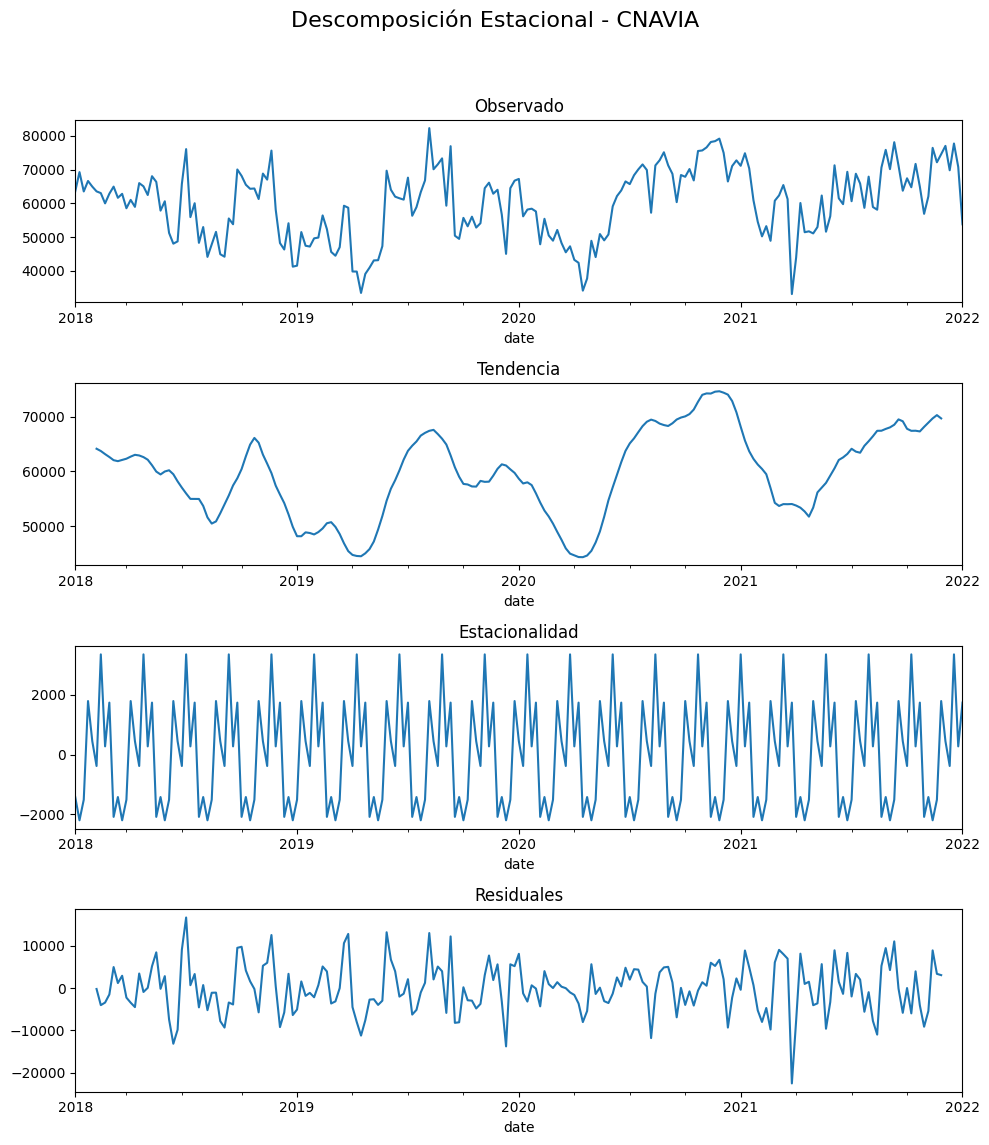

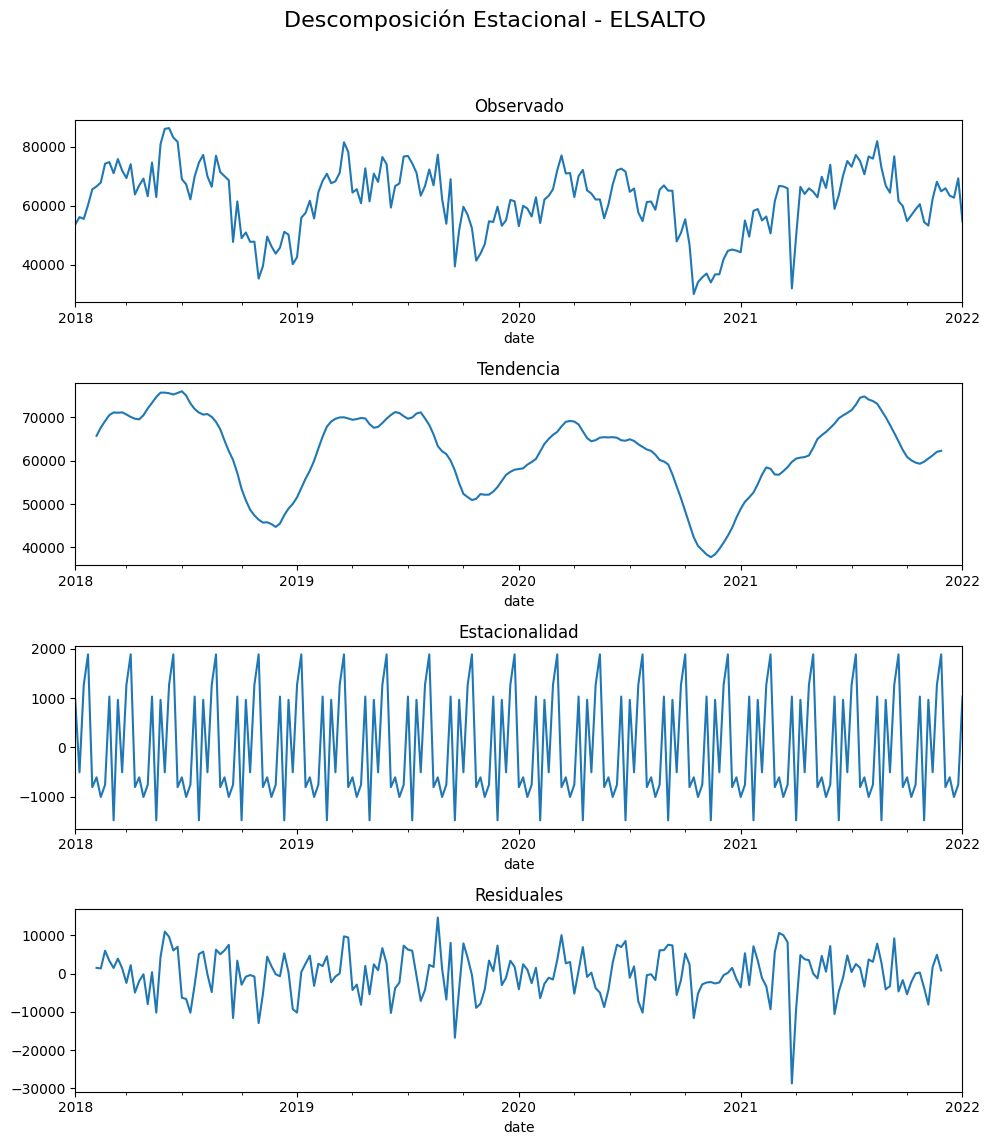

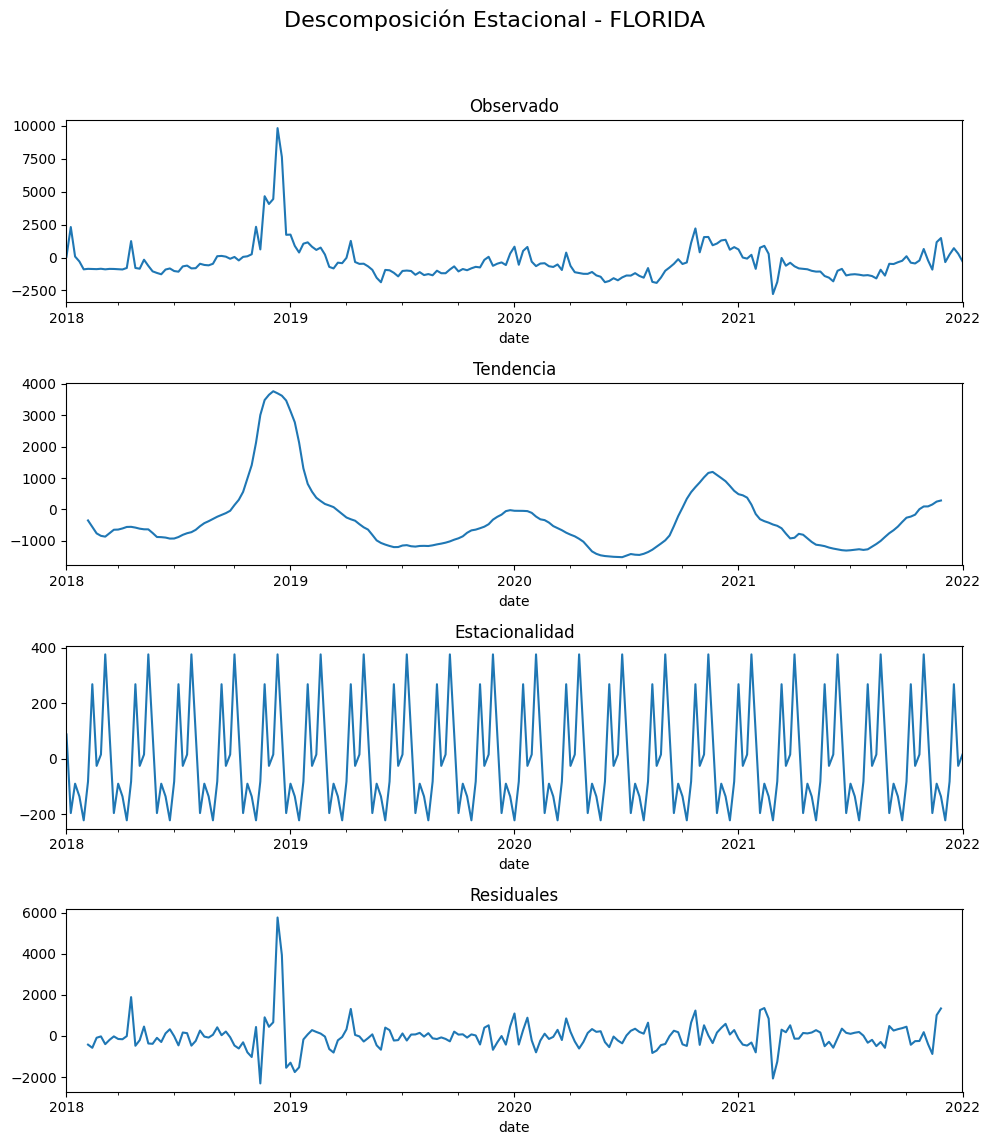

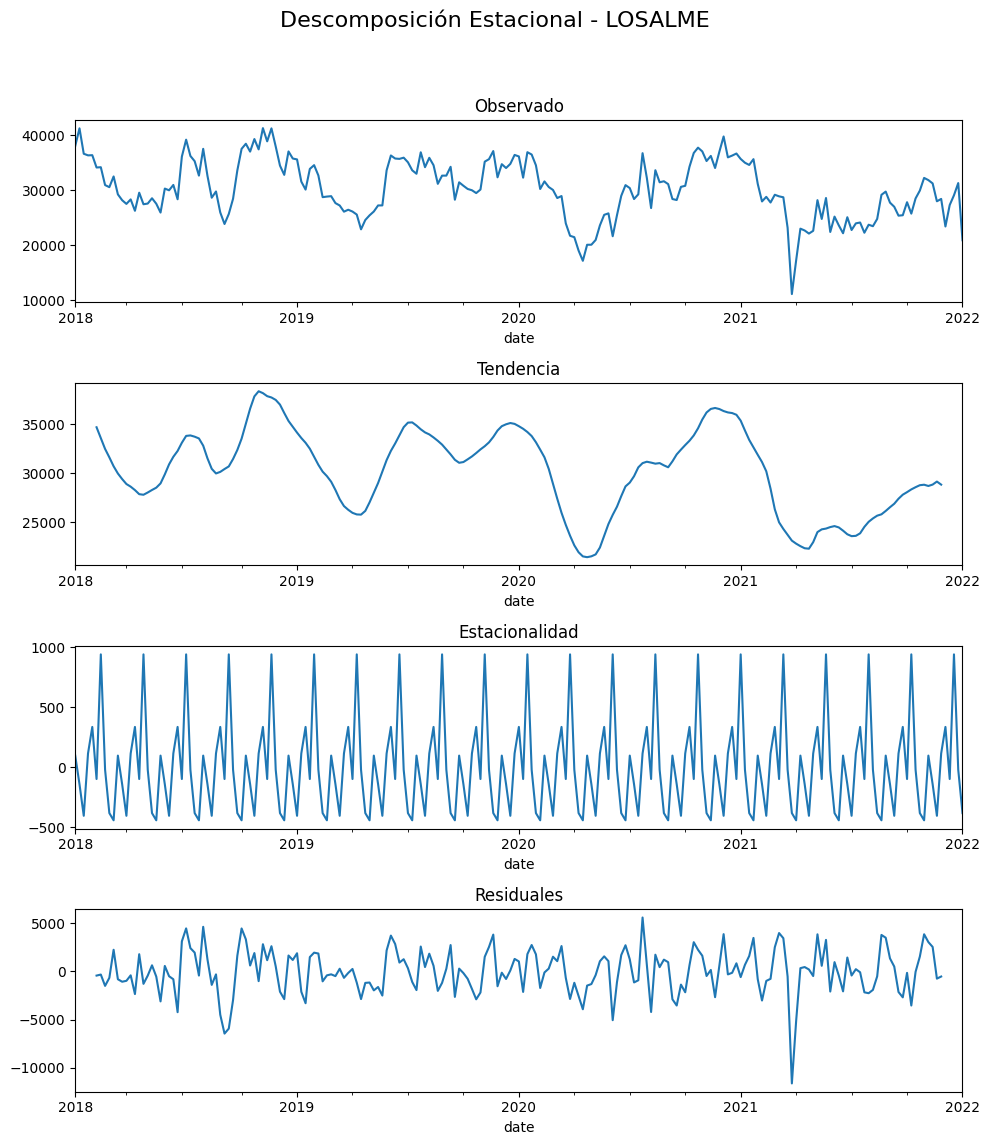

In [20]:
# Parámetro para el período de la descomposición estacional
period = 10

# Graficar la descomposición estacional para cada subestación
for substation in substations:
    # Filtrar los datos para la subestación actual y asegurar que solo se toman los datos mensuales
    data_substation = data_weekly.xs(substation, level='substation')['consumption']
    
    # Aplicar la descomposición estacional
    resultado = seasonal_decompose(data_substation, model='additive', period=period)
    
    # Crear una figura para cada subestación
    fig, axes = plt.subplots(4, 1, figsize=(10, 12))
    fig.suptitle(f'Descomposición Estacional - {substation}', fontsize=16)
    
    # Graficar los componentes de la descomposición
    resultado.observed.plot(ax=axes[0], title='Observado')
    resultado.trend.plot(ax=axes[1], title='Tendencia')
    resultado.seasonal.plot(ax=axes[2], title='Estacionalidad')
    resultado.resid.plot(ax=axes[3], title='Residuales')
    
    # Ajustar el diseño para que no se solapen los gráficos
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
